## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D  # Convolutional Layers
from keras.layers import Dense, Dropout, Flatten # Core Layers
from keras.layers import BatchNormalization
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Import Dataset
MNIST Digit Dataset contains handwritten digits 0-9

In [ ]:
# Split data into train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()  # Download the MNIST dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Check the shape - must be 3, not 2
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_test.shape}")
print("\n")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (60000, 28, 28)
y_train Shape: (10000,)


X_test Shape: (10000, 28, 28)
y_test Shape: (10000,)


In [ ]:
# Reshape the input data (X)
X_train = np.expand_dims(X_train, -1)  # np.expand_dims() adds a new dimension to the array. -1 means add new dimension at the end
X_test = np.expand_dims(X_test, -1)

# View the new shape
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")


X_train Shape: (60000, 28, 28, 1)
X_test Shape: (10000, 28, 28, 1)


In [ ]:
# Print the number of samples
print(X_train.shape[0], "train samples (X_train)")
print(y_train.shape[0], "train samples (y_train)")
print("\n")
print(X_test.shape[0], "test samples (X_test)")
print(y_test.shape[0], "test samples (y_test)")

60000 train samples (X_train)
60000 train samples (y_train)


10000 test samples (X_test)
10000 test samples (y_test)


## View Some Images

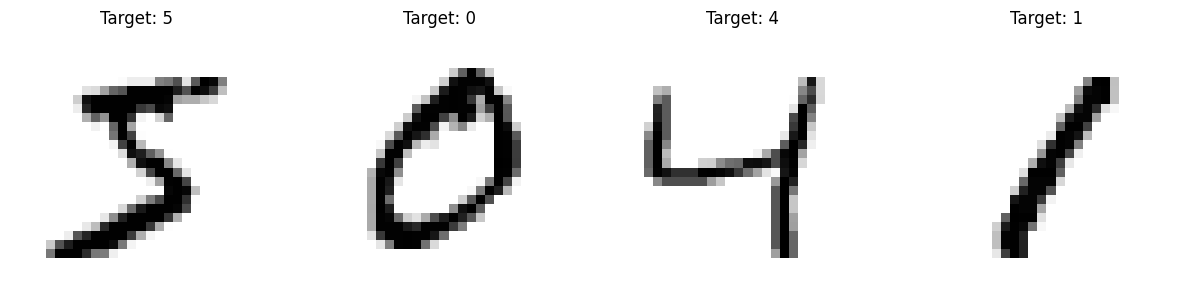

In [ ]:
# Plot the first 4 images along with their target value
images = X_train[:4]
labels = y_train[:4]

plt.figure(figsize=(15,7))

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(images[i], cmap="binary")
  plt.title(f"Target: {labels[i]}")
  plt.axis("off")



## Normalization

In [ ]:
# Check range of greyscale values (0-255)
print("Lowest Pixel Value:", X_train[0].min())
print("Highest Pixel Value:", X_train[0].max())

Lowest Pixel Value: 0
Highest Pixel Value: 255


In [ ]:
# Scale the Images to [0,1] range
X_train = X_train.astype("float32") / 255  # Neural networks expect float inputs, not integers
X_test = X_test.astype("float32") / 255

print("After Normalization:")
print("Lowest Pixel Value:", X_train[3].min())
print("Highest Pixel Value:", X_train[3].max())


After Normalization:
Lowest Pixel Value: 0.0
Highest Pixel Value: 1.0


In [ ]:
# Check if normalized
print("Lowest Pixel Value:", X_train[0].min())
print("Highest Pixel Value:", X_train[0].max())

Lowest Pixel Value: 0.0
Highest Pixel Value: 1.0


## Label Encoding

In [ ]:
# Model and Data Parameters
num_classes = 10  # Number of possible output categories (0-9)
input_shape = (28, 28, 1)

# Convert class vectors to binary class structures
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)  # Converts integer labels to one-hot encoded vectors
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
# View One-Hot Encoded Samples
print("For the First 4 Images:")
print("Original Labels:\n", y_train[:4])
print("\n")
print("One-Hot Encoded Labels:")
print(y_train_onehot[:4])

For the First 4 Images:
Original Labels:
 [5 0 4 1]


One-Hot Encoded Labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Building the Model

In [ ]:
model = Sequential()  # Sequential creates Linear stack of layers (model is now an empty nn ready for layers)

# Convolutional Layers (Feature Extraction)
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))  # 1st convolution layer - Keras needs to know shape of input images
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))  # 2nd convolution layer - input layer no longer needed. (2nd layer for learning more complex feature. Takes the feature maps from first layer as input)
model.add(MaxPooling2D(pool_size=(2,2)))  # Reduces the image size of the feature map while keeping the most important information (feature map is the output of a convolutional layer after a filter has scanned the image)
model.add(Dropout(0.4))  # Regularization technique to reduce overfitting. Will randomly drop a fraction of neurons in the layer (40%) in training only

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# Dense Layers (Classification)
model.add(Flatten())  # Converts multi-dimensional featuree maps to 1D vector
model.add(Dense(512, activation="relu"))  # Fully connected layer. Each neuron connects to all inputs (512 neurons in this layer)

# Final Layer (Output)
model.add(Dense(10, activation="softmax"))  # 10 neurons. Each neuron represents a class in the dataset (0-9). Softmax converts the 10 output values into probabilties that sum to 1 eg. [0.01, 0.05, 0.0, 0.9, 0.02, 0.0, 0.01, 0.01, 0.0, 0.0]. Highest probability = Model's Prediction

# Prepare the model for training
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()  # Shows model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,426 (2.64 MB)

 Trainable params: 691,658 (2.64 MB)

 Non-trainable params: 768 (3.00 KB)

## Data Augmentation

In [ ]:
# ImageDataGenerator is a Keras tool that creates augmented images during training to help the CNN generalize better by exposing it to many slightly modified versions of the same image - reduces overfitting and improves accuracy

datagen = ImageDataGenerator(
    rotation_range = 15,  # randomly rotate the images in the range =15 and -15 degrees (degrees 0-180)
    zoom_range = 0.01,    # randomly zooms in and out of images by 1%
    width_shift_range = 0.1,    # randomly shifts images horizontally (left and right) up to 10% of image width (fraction of total width)
    height_shift_range = 0.1,   # randomly shifts images vertically (up and down) up to 10% of image height (fraction of total height)
    horizontal_flip = False,    # randomly flips images left and right (False in this case)
    vertical_flip = False      # randomly flips image up and down (False in this case)
)

train_gen = datagen.flow(X_train, y_train_onehot, batch_size=128)  # datagen.flow() takes images(X_train) and labels(y_train_onehot) and produces a generator object that will give batches of iamges during training
test_gen = datagen.flow(X_test, y_test_onehot, batch_size=128)  # No augmentation occurs to test data (ImageDataGenerator does not apply t)


## Model Training

In [ ]:
# Training Hyperparameters
epochs = 3  # Model goes though entire training dataset 3 times
batch_size = 128  # Processes 128 images at once then updates its weights
train_steps = X_train.shape[0] // batch_size  #  60,000 // 128 = 468 (468 batches to represent one epoch)
valid_steps = X_test.shape[0] // batch_size  # 10,000 // 128 = 78 (78 steps per evaluation)

# Early Stopping - Regularization
earlystop = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",  # callback watches validation accuracy - if it stops improving, training stops early
    patience=3,  # Wait 3 epochs after the last improvement, if accuracy still doesn't improve, stop training.
    verbose=1,  # Prints message when early stopping happens
    mode="max",  # Look for maximum accuracy
    restore_best_weights=True  # after stopping, model goes to best validation accuracy epoch
)

In [ ]:
# Training
history = model.fit(
    train_gen,
    epochs = epochs,
    steps_per_epoch = train_steps,
    validation_data = test_gen,
    validation_steps = valid_steps,
    callbacks = [earlystop]
    )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
468/468 ━━━━━━━━━━━━━━━━━━━━ 523s 1s/step - accuracy: 0.8656 - loss: 0.4128 - val_accuracy: 0.9785 - val_loss: 0.0665
Epoch 2/3
  1/468 ━━━━━━━━━━━━━━━━━━━━ 7:08 918ms/step - accuracy: 0.9609 - loss: 0.0923

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.9609 - loss: 0.0923 - val_accuracy: 0.9767 - val_loss: 0.0719
Epoch 3/3
468/468 ━━━━━━━━━━━━━━━━━━━━ 561s 1s/step - accuracy: 0.9790 - loss: 0.0659 - val_accuracy: 0.9862 - val_loss: 0.0441
Restoring model weights from the end of the best epoch: 3.


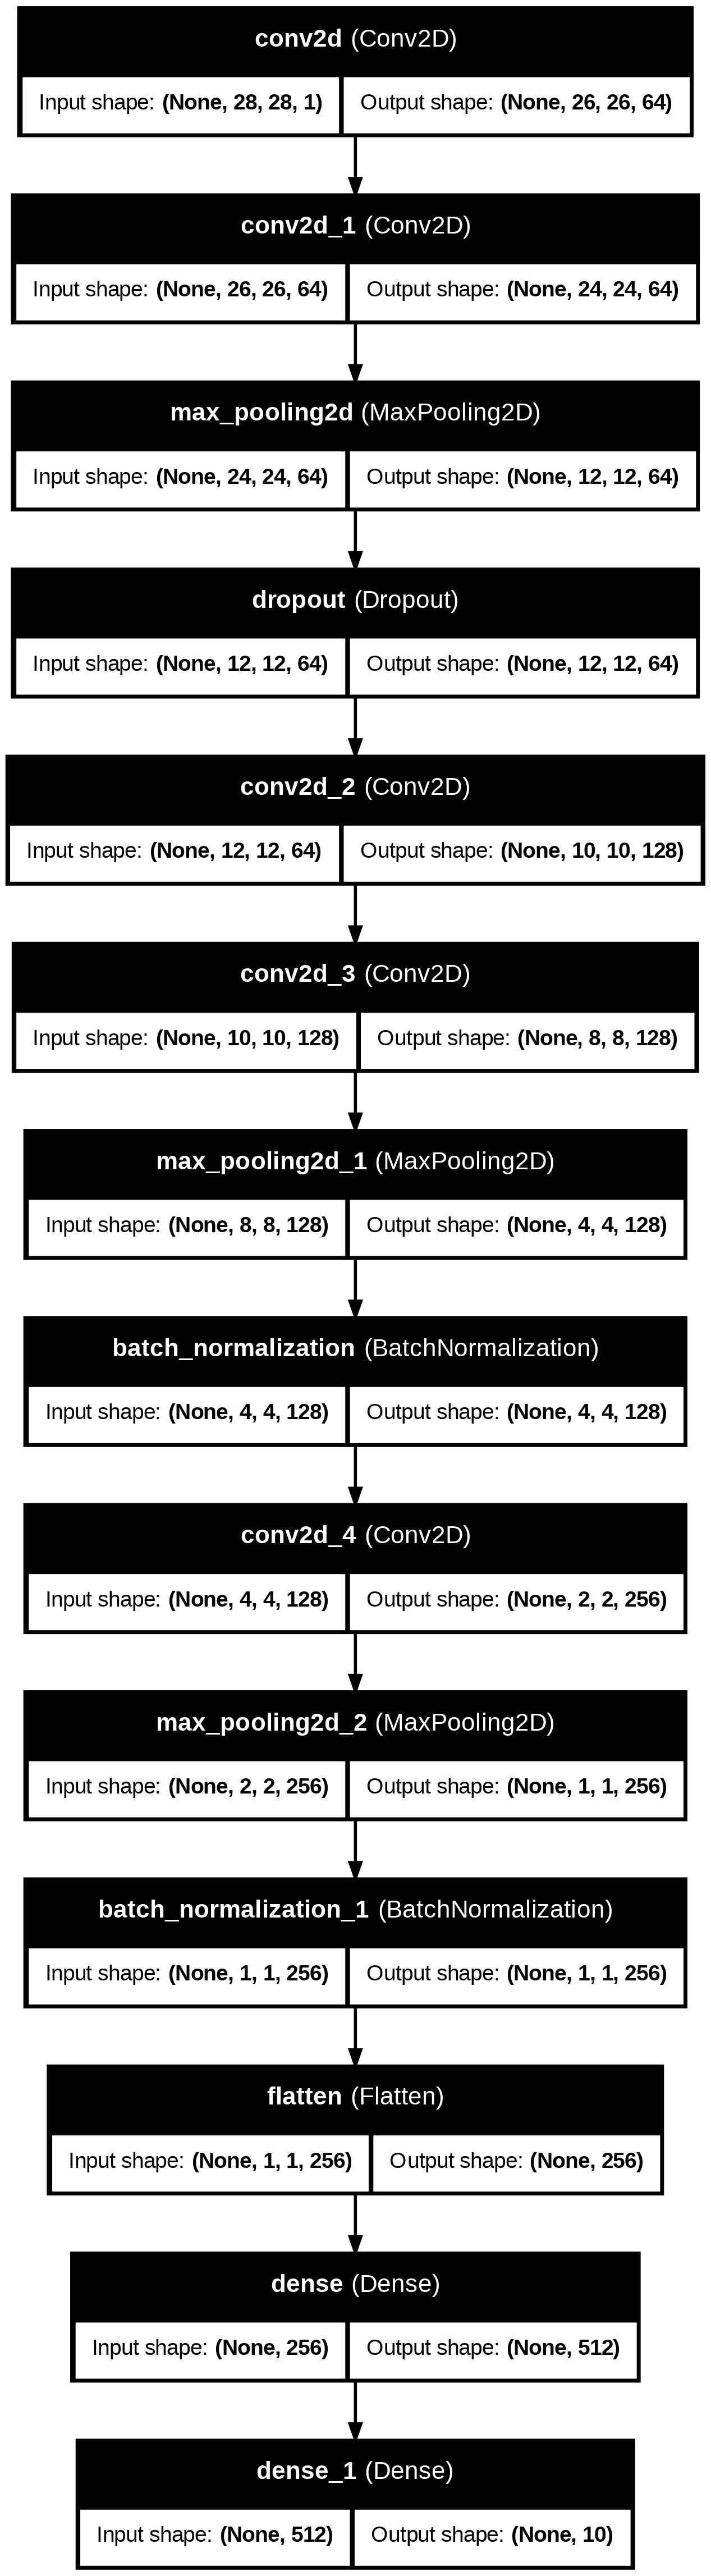

In [ ]:
# Visualization of CNN Archicture
plot_model(model,
           to_file="CNN_model_arch.png",
           show_shapes=True,
           show_layer_names=True)

## Evaluate the Model

In [ ]:
score = model.evaluate(X_test, y_test_onehot, verbose=0)
print("Test Loss:", round(score[0], 4))
print("Test Accuracy:", round(score[1], 4))


Test Loss: 0.048
Test Accuracy: 0.9857


In [ ]:
# Metrics collected during training
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
# Convert Training history into tabular form
evaluation = pd.DataFrame(history.history)
evaluation.head()

,accuracy,loss,val_accuracy,val_loss
0,0.941559,0.183962,0.978466,0.066493
1,0.960938,0.092293,0.976663,0.071942
2,0.980108,0.064499,0.986178,0.044086


<Axes: >

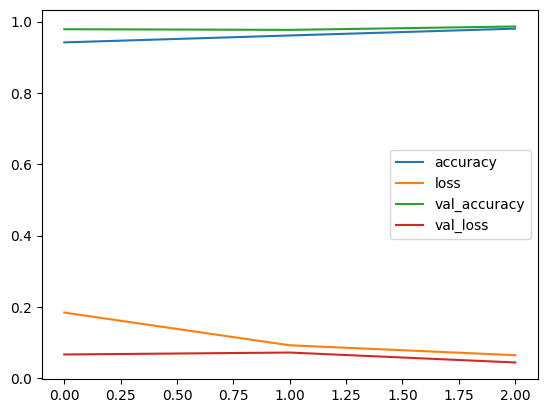

In [ ]:
# Plot all columns in training history across epochs (x-axis)
evaluation.plot()

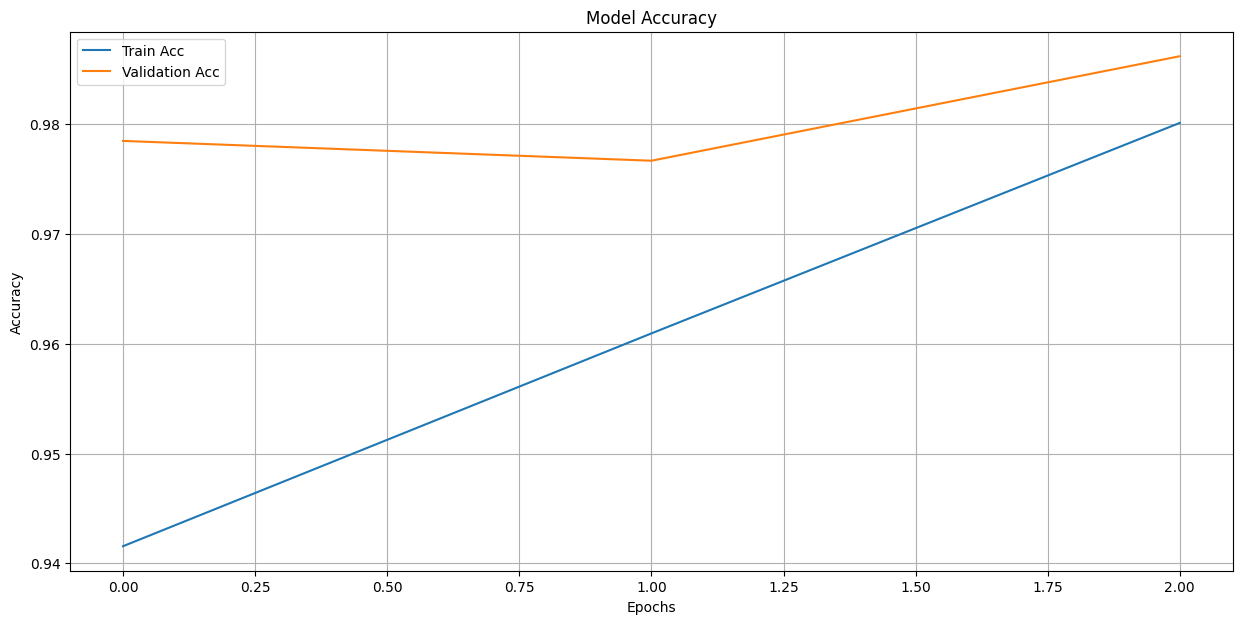

In [ ]:
# Plot Model Accuracy
plt.figure(figsize=(15,7))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Acc", "Validation Acc"])
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step


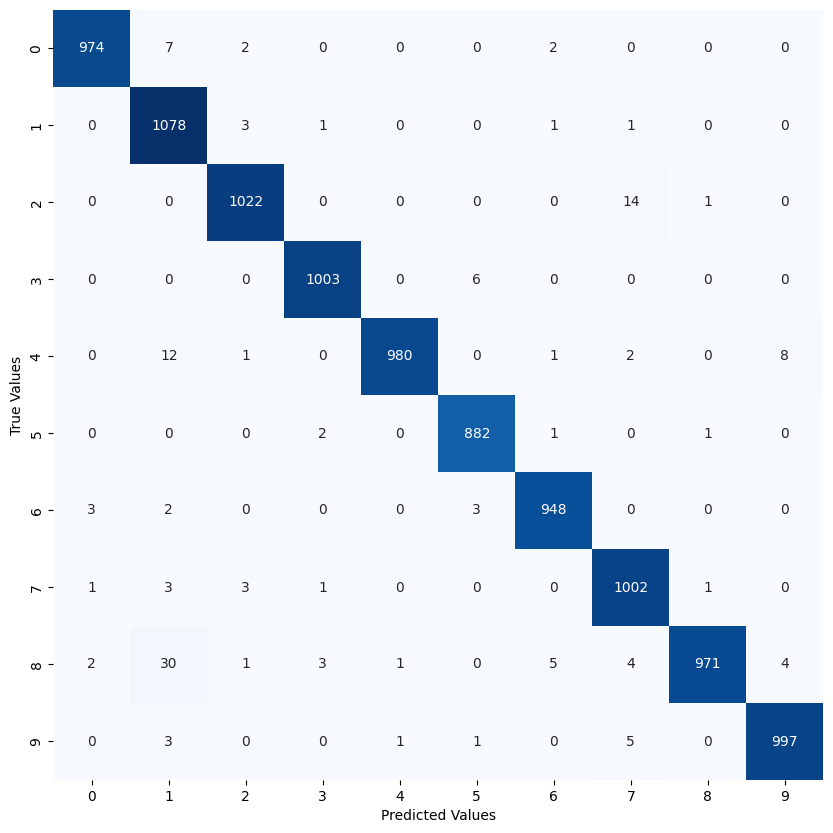

In [ ]:
fig = plt.figure(figsize=(10,10))

y_pred_probs = model.predict(X_test)

y_pred_classes= np.argmax(y_pred_probs, 1)
y_true_classes = np.argmax(y_test_onehot, 1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot Matrix
sns.heatmap(cm.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

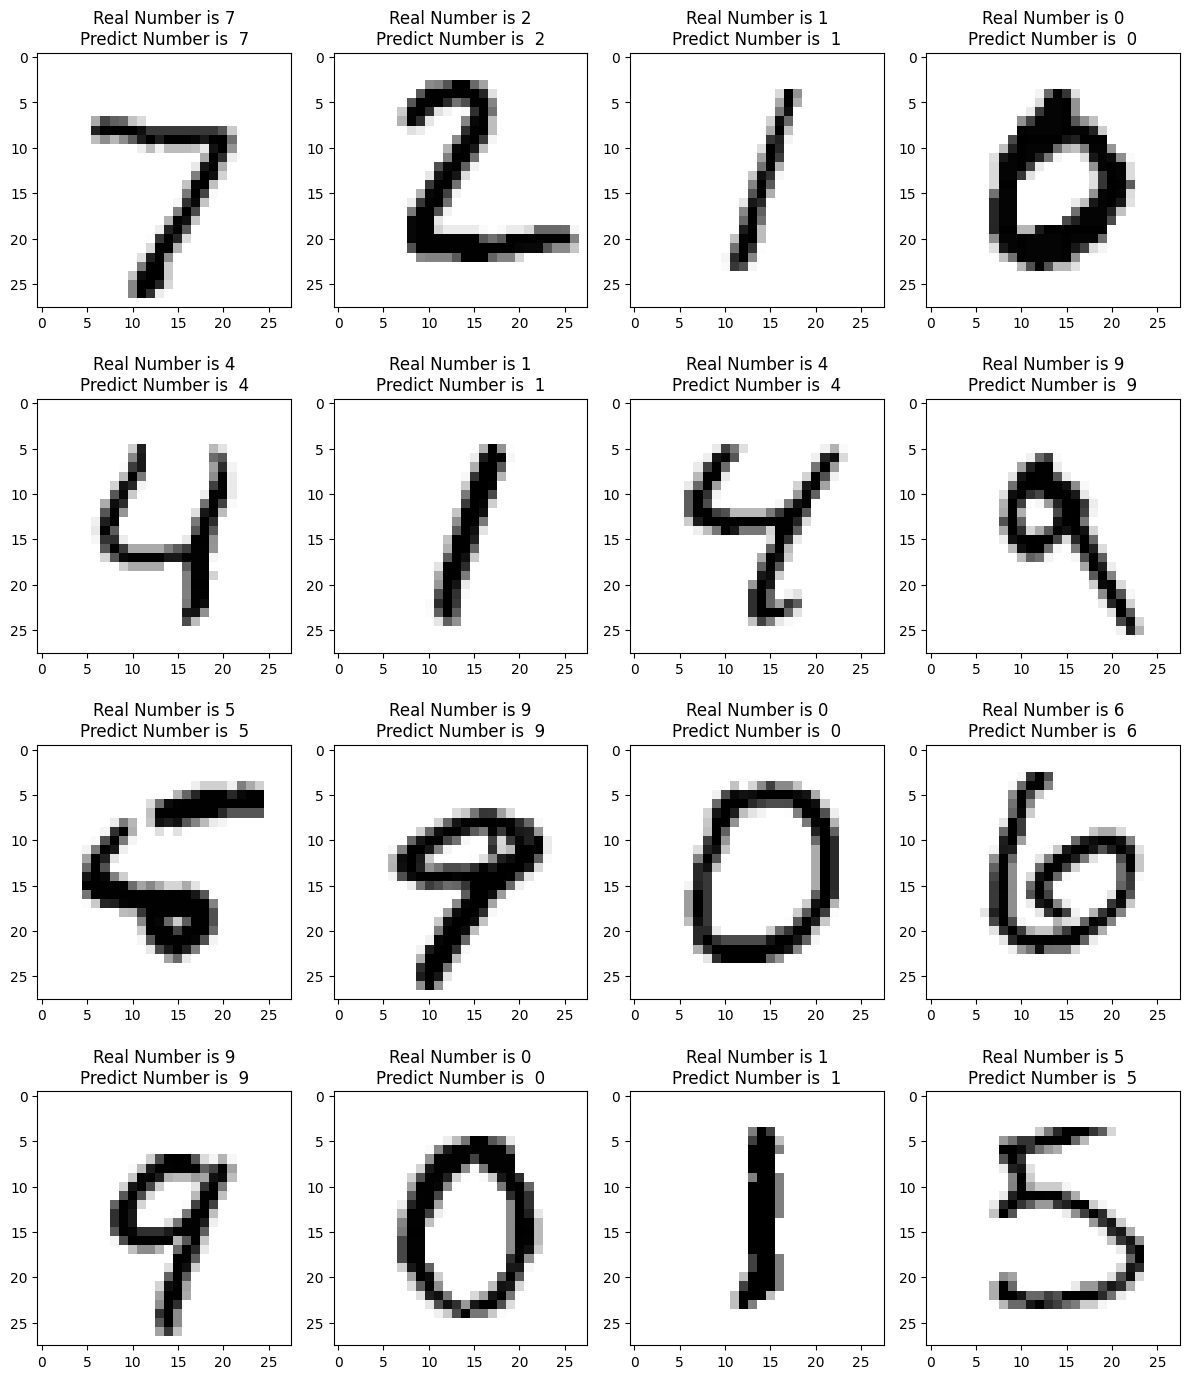

In [ ]:
# y_pred = model.predict(X_test)

# Remove channel dimension for plotting
X_test_images = X_test.reshape(X_test.shape[0], 28, 28)

# Create 4x4 grid
fig, axis = plt.subplots(4, 4, figsize=(12,14))

# Plot Images
# for i, ax in enumerate(axis.flat):
#   ax.imshow(X_test_images[i], cmap="binary")
#   ax.set(title = f"Real Number is {y_true_classes[i]}\nPredict Number is  {y_pred_classes[i]}")

for i, ax in enumerate(axis.flat):
  ax.imshow(X_test_images[i], cmap="binary")

  true_label = y_true_classes[i]
  pred_label = y_pred_classes[i]

  # Check if prediction is correct
  if true_label == pred_label:
    title_color = "black"
  else:
    title_color = "red"

  ax.set_title(f"Real Number is {true_label}\nPredict Number is  {pred_label}", color=title_color)

plt.tight_layout()
plt.show()

## View Any Image in Dataset

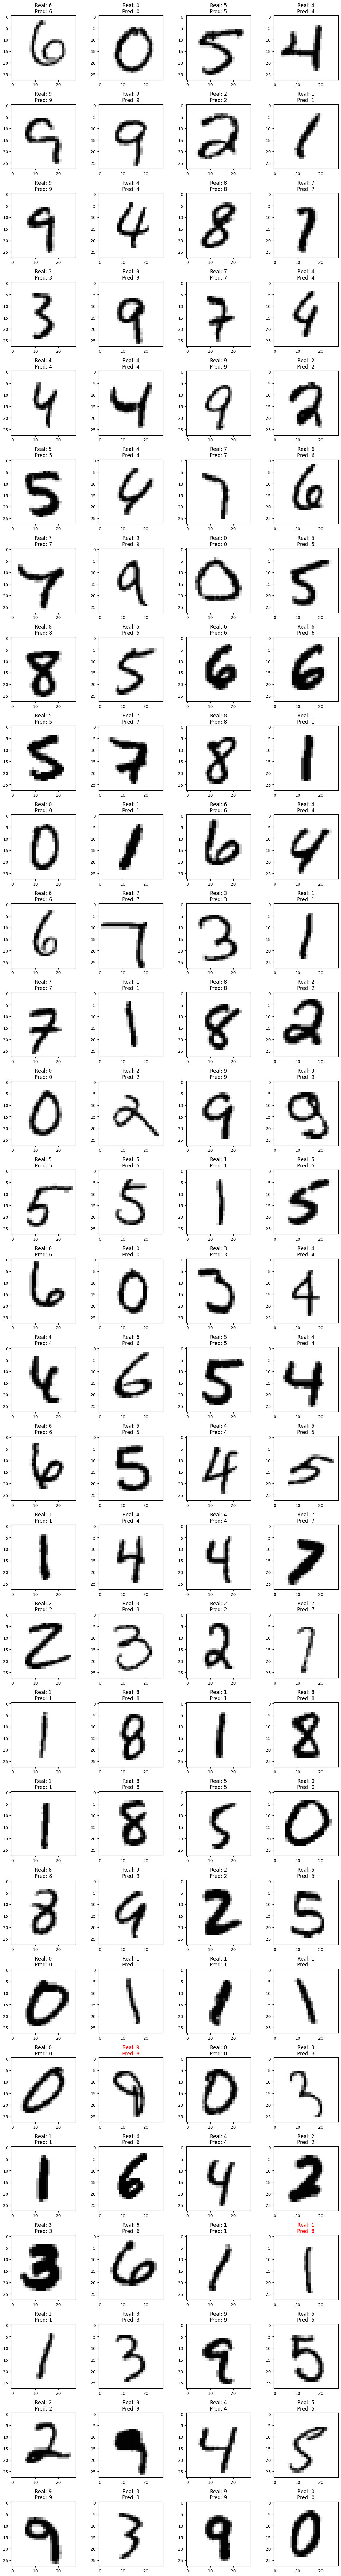

In [ ]:
def plot_mnist_predictions(X_images, y_true, y_pred, start_index=0, num_images=16, cols=4):
    # Ensure X_images has shape (num_samples, 28, 28)
    if X_images.ndim == 4 and X_images.shape[-1] == 1:
        X_images = X_images.reshape(X_images.shape[0], 28, 28)

    rows = (num_images + cols - 1) // cols  # compute rows needed
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

    for i, ax in enumerate(axes.flat):
        idx = start_index + i
        if idx >= len(X_images):
            ax.axis("off")
            continue

        ax.imshow(X_images[idx], cmap="binary")
        true_label = y_true[idx]
        pred_label = y_pred[idx]
        color = "black" if true_label == pred_label else "red"

        ax.set_title(f"Real: {true_label}\nPred: {pred_label}", color=color)

    plt.tight_layout()
    plt.show()

plot_mnist_predictions(X_test, y_true_classes, y_pred_classes, start_index=100, num_images=115)
